## 1. Введение

База данных представляет собой сборник записей обо всех экспедициях, покоривших непальские Гималаи. База данных основана на экспедиционных архивах Элизабет Хоули, давнего журналиста из Катманду, и дополнена информацией, собранной из книг, альпийских журналов и переписки с гималайскими альпинистами. 

Данные охватывают все экспедиции с 1905 года по весну 2019 года на более чем 465 значительных вершин Непала. Также включены экспедиции к обеим сторонам пограничных пиков, таких как Эверест, Чо-Ойю, Макалу и Канченджанга, а также к некоторым меньшим пограничным пикам. 

Данные об экспедициях на трекинговые вершины включены для ранних попыток, первых восхождений и крупных инцидентов.


1.1 Цели

Мы рассмотрим  динамику и структуру основных показателей, а также некоторые интересные факты.

В ходе анализа мы попытаемся найти факторы, которые влияют на успех и риски экспедиций.

In [1]:
# импорт  библиотек, необходимых для анализа 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
# отключение предупреждений
import warnings; warnings.filterwarnings("ignore", category=Warning)

### Загрузка данных

In [2]:
expeditions = pd.read_csv('data\expeditions.csv')
members = pd.read_csv('data\members.csv')
peaks = pd.read_csv('data\peaks.csv')

In [3]:
expeditions.head()

,expedition_id,peak_id,peak_name,year,season,basecamp_date,highpoint_date,termination_date,termination_reason,highpoint_metres,members,member_deaths,hired_staff,hired_staff_deaths,oxygen_used,trekking_agency
0,ANN260101,ANN2,Annapurna II,1960,Spring,1960-03-15,1960-05-17,NaN,Success (main peak),7937.0,10,0,9,0,True,NaN
1,ANN269301,ANN2,Annapurna II,1969,Autumn,1969-09-25,1969-10-22,1969-10-26,Success (main peak),7937.0,10,0,0,0,False,NaN
2,ANN273101,ANN2,Annapurna II,1973,Spring,1973-03-16,1973-05-06,NaN,Success (main peak),7937.0,6,0,8,0,False,NaN
3,ANN278301,ANN2,Annapurna II,1978,Autumn,1978-09-08,1978-10-02,1978-10-05,"Bad weather (storms, high winds)",7000.0,2,0,0,0,False,NaN
4,ANN279301,ANN2,Annapurna II,1979,Autumn,NaN,1979-10-18,1979-10-20,"Bad weather (storms, high winds)",7160.0,3,0,0,0,False,NaN


In [4]:
members.head()

,expedition_id,member_id,peak_id,peak_name,year,season,sex,age,citizenship,expedition_role,...,highpoint_metres,success,solo,oxygen_used,died,death_cause,death_height_metres,injured,injury_type,injury_height_metres
0,AMAD78301,AMAD78301-01,AMAD,Ama Dablam,1978,Autumn,M,40.0,France,Leader,...,NaN,False,False,False,False,NaN,NaN,False,NaN,NaN
1,AMAD78301,AMAD78301-02,AMAD,Ama Dablam,1978,Autumn,M,41.0,France,Deputy Leader,...,6000.0,False,False,False,False,NaN,NaN,False,NaN,NaN
2,AMAD78301,AMAD78301-03,AMAD,Ama Dablam,1978,Autumn,M,27.0,France,Climber,...,NaN,False,False,False,False,NaN,NaN,False,NaN,NaN
3,AMAD78301,AMAD78301-04,AMAD,Ama Dablam,1978,Autumn,M,40.0,France,Exp Doctor,...,6000.0,False,False,False,False,NaN,NaN,False,NaN,NaN
4,AMAD78301,AMAD78301-05,AMAD,Ama Dablam,1978,Autumn,M,34.0,France,Climber,...,NaN,False,False,False,False,NaN,NaN,False,NaN,NaN


In [5]:
peaks.head()

,peak_id,peak_name,peak_alternative_name,height_metres,climbing_status,first_ascent_year,first_ascent_country,first_ascent_expedition_id
0,AMAD,Ama Dablam,Amai Dablang,6814,Climbed,1961.0,"New Zealand, USA, UK",AMAD61101
1,AMPG,Amphu Gyabjen,NaN,5630,Climbed,1953.0,UK,AMPG53101
2,ANN1,Annapurna I,NaN,8091,Climbed,1950.0,France,ANN150101
3,ANN2,Annapurna II,NaN,7937,Climbed,1960.0,"UK, Nepal",ANN260101
4,ANN3,Annapurna III,NaN,7555,Climbed,1961.0,India,ANN361101


### Подготовка и очистка данных

In [6]:
# объединим загруженные дата-фреймы
df_total = members.merge(expeditions, how='left')
df_total = df_total.merge(peaks, how='left')
df_total.head()

,expedition_id,member_id,peak_id,peak_name,year,season,sex,age,citizenship,expedition_role,...,member_deaths,hired_staff,hired_staff_deaths,trekking_agency,peak_alternative_name,height_metres,climbing_status,first_ascent_year,first_ascent_country,first_ascent_expedition_id
0,AMAD78301,AMAD78301-01,AMAD,Ama Dablam,1978,Autumn,M,40.0,France,Leader,...,NaN,NaN,NaN,NaN,Amai Dablang,6814.0,Climbed,1961.0,"New Zealand, USA, UK",AMAD61101
1,AMAD78301,AMAD78301-02,AMAD,Ama Dablam,1978,Autumn,M,41.0,France,Deputy Leader,...,0.0,5.0,0.0,NaN,Amai Dablang,6814.0,Climbed,1961.0,"New Zealand, USA, UK",AMAD61101
2,AMAD78301,AMAD78301-03,AMAD,Ama Dablam,1978,Autumn,M,27.0,France,Climber,...,NaN,NaN,NaN,NaN,Amai Dablang,6814.0,Climbed,1961.0,"New Zealand, USA, UK",AMAD61101
3,AMAD78301,AMAD78301-04,AMAD,Ama Dablam,1978,Autumn,M,40.0,France,Exp Doctor,...,0.0,5.0,0.0,NaN,Amai Dablang,6814.0,Climbed,1961.0,"New Zealand, USA, UK",AMAD61101
4,AMAD78301,AMAD78301-05,AMAD,Ama Dablam,1978,Autumn,M,34.0,France,Climber,...,NaN,NaN,NaN,NaN,Amai Dablang,6814.0,Climbed,1961.0,"New Zealand, USA, UK",AMAD61101


Проверим дата-сет на наличие пропущенных данных

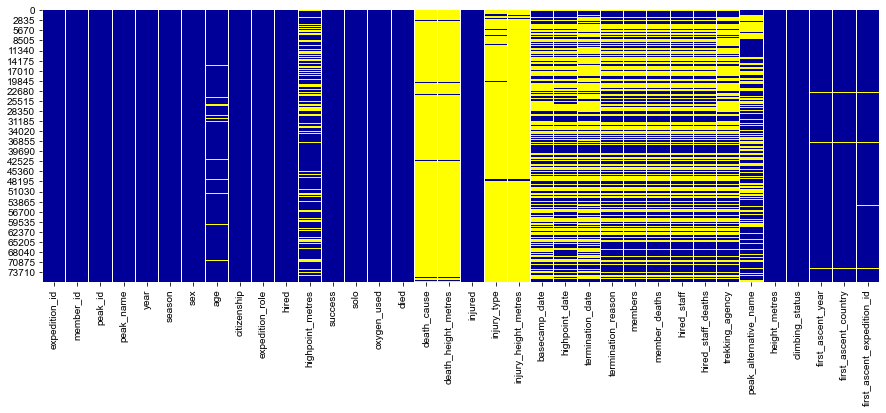

In [7]:
# желтый - пропущенные данные
fig, ax = plt.subplots(figsize=(15,5))
colours = ['#000099', '#ffff00'] 
sns.set(font_scale=1.6)
sns.heatmap(df_total.isnull(), cbar=False, cmap=sns.color_palette(colours))
plt.show()

In [8]:
# исключим столбцы 'death_cause' - 'peak_alternative_name' ввиду большого количества пропусков данных -  заполнять их бессмысленно, а удалять также не вариант

df_total_clean = df_total[['peak_name', 'year', 'season',
       'sex', 'age', 'citizenship', 'expedition_role', 'hired',
       'highpoint_metres', 'success', 'solo', 'oxygen_used', 'died',
        'injured', 'height_metres', 'climbing_status',
       'first_ascent_year', 'first_ascent_country', 'expedition_id','member_id']]

In [9]:
# highpoint_metres - заполним пропуски медианным значением
df_total_clean['highpoint_metres'].fillna(df_total_clean['highpoint_metres'].median(),inplace=True)

# age - заполним пропуски модой
mode_age = df_total_clean['age'].mode()
df_total_clean['age'].fillna(mode_age[0],inplace=True)

# Для корректной работы матрицы корреляции заменим значения False и True на численные значения
df_total_clean.replace({False:0, True:1}, inplace=True)

Проверим результат предобработки

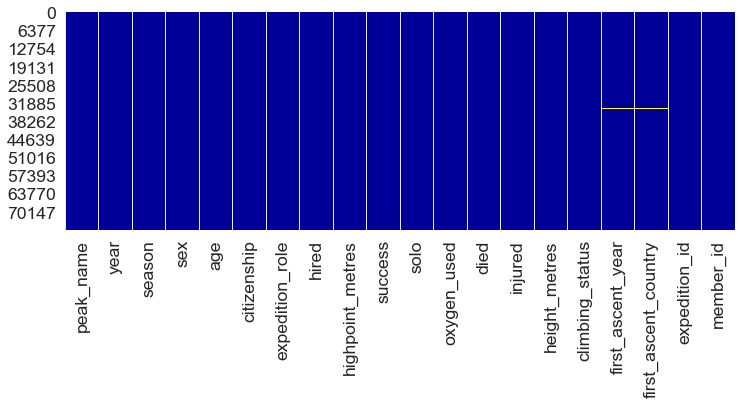

In [10]:
# желтый - пропущенные данные
fig, ax = plt.subplots(figsize=(12,4))
colours = ['#000099', '#ffff00'] 
sns.set(font_scale=1.6)
sns.heatmap(df_total_clean.isnull(), cbar=False, cmap=sns.color_palette(colours))
plt.show()

In [11]:
(df_total_clean.isnull().sum().sum() / df_total_clean.notnull().sum().sum()) * 100

0.08593481249337831

Пропуски присутствуют, их заполнение и удаление нецелесобразно, при этом их процент незначителен 
(0.1%).

Теперь можно приступить к анализу данных

## 2. Описательный анализ данных

### Описание дата-сета

•	peak_name – название вершины

•	year  - год экспедиции

•	season – сезон (время года)

•	sex - пол

•	age - возраст

•	citizenship – гражданство участника

•	expedition_role – роль в экспедиции

•	hired - наемный

•	highpoint_metres

•	success – достигнута вершина

•	solo – соло-восхождение(1 участник)

•	oxygen_used – использование при восхождении кислорода

•	died – смерть при восхождении

•	injured – травмы при восхождении

•	height_metres – высота вершины

•	climbing_status – статус вершины (покорена или нет)

•	first_ascent_year – первый год восхождения на вершину

•	first_ascent_country – страна-первопроходитель


In [12]:
df_total_clean.head()

,peak_name,year,season,sex,age,citizenship,expedition_role,hired,highpoint_metres,success,solo,oxygen_used,died,injured,height_metres,climbing_status,first_ascent_year,first_ascent_country,expedition_id,member_id
0,Ama Dablam,1978,Autumn,M,40.0,France,Leader,0,7400.0,0,0,0,0,0,6814.0,Climbed,1961.0,"New Zealand, USA, UK",AMAD78301,AMAD78301-01
1,Ama Dablam,1978,Autumn,M,41.0,France,Deputy Leader,0,6000.0,0,0,0,0,0,6814.0,Climbed,1961.0,"New Zealand, USA, UK",AMAD78301,AMAD78301-02
2,Ama Dablam,1978,Autumn,M,27.0,France,Climber,0,7400.0,0,0,0,0,0,6814.0,Climbed,1961.0,"New Zealand, USA, UK",AMAD78301,AMAD78301-03
3,Ama Dablam,1978,Autumn,M,40.0,France,Exp Doctor,0,6000.0,0,0,0,0,0,6814.0,Climbed,1961.0,"New Zealand, USA, UK",AMAD78301,AMAD78301-04
4,Ama Dablam,1978,Autumn,M,34.0,France,Climber,0,7400.0,0,0,0,0,0,6814.0,Climbed,1961.0,"New Zealand, USA, UK",AMAD78301,AMAD78301-05


In [13]:
# Посмотрим на типы переменных и количество данных
df_total_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76519 entries, 0 to 76518
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   peak_name             76504 non-null  object 
 1   year                  76519 non-null  int64  
 2   season                76519 non-null  object 
 3   sex                   76517 non-null  object 
 4   age                   76519 non-null  float64
 5   citizenship           76509 non-null  object 
 6   expedition_role       76498 non-null  object 
 7   hired                 76519 non-null  int64  
 8   highpoint_metres      76519 non-null  float64
 9   success               76519 non-null  int64  
 10  solo                  76519 non-null  int64  
 11  oxygen_used           76519 non-null  int64  
 12  died                  76519 non-null  int64  
 13  injured               76519 non-null  int64  
 14  height_metres         76504 non-null  float64
 15  climbing_status    

In [14]:
df_total.describe()

,year,age,highpoint_metres,death_height_metres,injury_height_metres,members,member_deaths,hired_staff,hired_staff_deaths,height_metres,first_ascent_year
count,76519.000000,73022.000000,54686.000000,1068.000000,1009.000000,40149.000000,40149.000000,40149.000000,40149.000000,76504.000000,75901.000000
mean,2000.361714,37.334297,7470.680759,6592.850187,7049.913776,9.004658,0.077735,5.718922,0.030486,7923.942774,1959.863704
std,14.780560,10.395602,1040.063830,1308.186282,1214.244710,7.705787,0.402010,8.666265,0.285858,843.591514,21.050757
min,1905.000000,7.000000,3800.000000,400.000000,400.000000,0.000000,0.000000,0.000000,0.000000,5407.000000,201.000000
25%,1991.000000,29.000000,6700.000000,5800.000000,6200.000000,4.000000,0.000000,1.000000,0.000000,7135.000000,1953.000000
50%,2004.000000,36.000000,7400.000000,6600.000000,7100.000000,7.000000,0.000000,3.000000,0.000000,8167.000000,1955.000000
75%,2012.000000,44.000000,8400.000000,7550.000000,8000.000000,12.000000,0.000000,7.000000,0.000000,8850.000000,1961.000000
max,2019.000000,85.000000,8850.000000,8830.000000,8880.000000,99.000000,10.000000,99.000000,10.000000,8850.000000,2019.000000


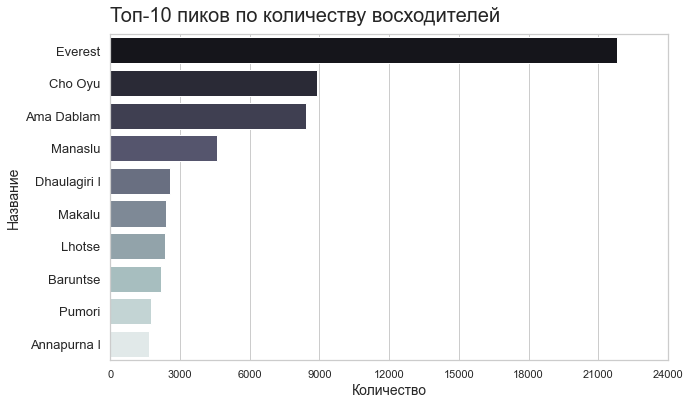

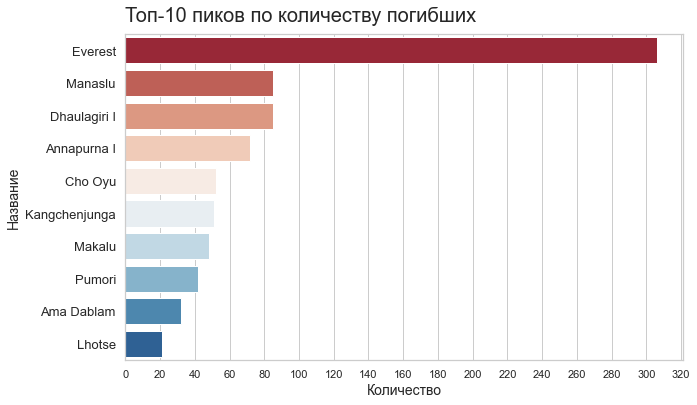

In [15]:
# Определим самые популярные горы у восходителей
peaks = df_total_clean.groupby('peak_name').count().sort_values('success',ascending=False).head(10)
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10,6))
# построим диаграмму barplot
sns.barplot(y=peaks.index,x=peaks['success'], palette='bone')
ax.set_title('Топ-10 пиков по количеству восходителей',loc='left',fontsize=20, y=1.02)
ax.set_ylabel('Название',fontsize = 14)
ax.set_xlabel('Количество',fontsize = 14)
ax.tick_params(axis='x', labelsize=11)
ax.tick_params(axis='y', labelsize=13)
ax.set_xticks(np.arange(0, 25000, 3000)) 

# Определим горы, на которых погибло больше всего восходителей
death_by_peaks = df_total_clean[df_total_clean['died'] == 1].groupby('peak_name').count().sort_values('died',ascending=False).head(10)
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(y=death_by_peaks.index,x=death_by_peaks['died'], palette='RdBu')
ax.set_title('Топ-10 пиков по количеству погибших',loc='left',fontsize=20, y=1.02)
ax.set_ylabel('Название',fontsize = 14)
ax.set_xlabel('Количество',fontsize = 14)
ax.tick_params(axis='x', labelsize=11)
ax.tick_params(axis='y', labelsize=13)
ax.set_xticks(np.arange(0, 330, 20)) 
plt.show()
plt.show()

Эверест является самой популярной вершиной у восходителей, а  также имеет самое больше количество погибших.

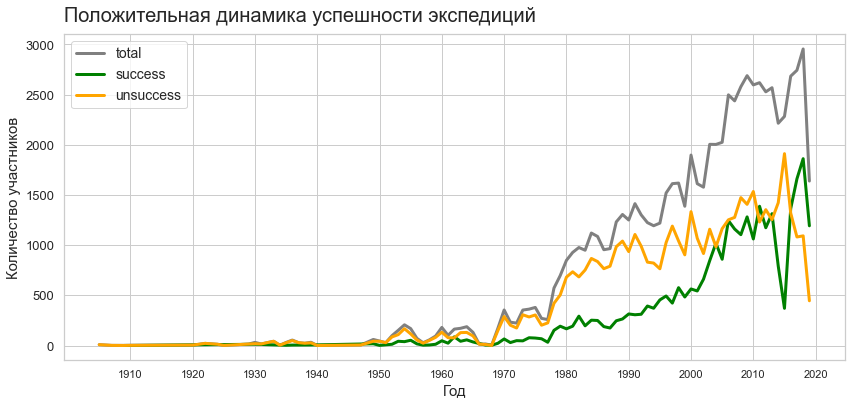

In [16]:
# Посмотрим на динамику восхождений
total = df_total_clean.groupby('year').count()
success = df_total_clean[df_total_clean['success'] == 1].groupby('year').count()
unsuccess = df_total_clean[df_total_clean['success'] != 1].groupby('year').count()

ax.set_title('Динамика успешности экспедиций',loc='left',fontsize=20, y=1.02)
fig, ax = plt.subplots(figsize=(14,6))
plt.plot(total.index, total['climbing_status'],linewidth = 3, color='gray',label='total')
plt.plot(success.index, success['climbing_status'],linewidth = 3, color='green',label='success')
plt.plot(unsuccess.index, unsuccess['climbing_status'],linewidth = 3, color='orange',label='unsuccess')
ax.set_title('Положительная динамика успешности экспедиций',loc='left',fontsize=20, y=1.02)
ax.set_ylabel('Количество участников',fontsize = 15)
ax.set_xlabel('Год',fontsize = 15)
ax.tick_params(axis='x', labelsize=11)
ax.tick_params(axis='y', labelsize=13)

plt.legend(loc=2, prop={'size': 14})
ax.set_xticks(np.arange(1910, 2025, 10))
plt.show()

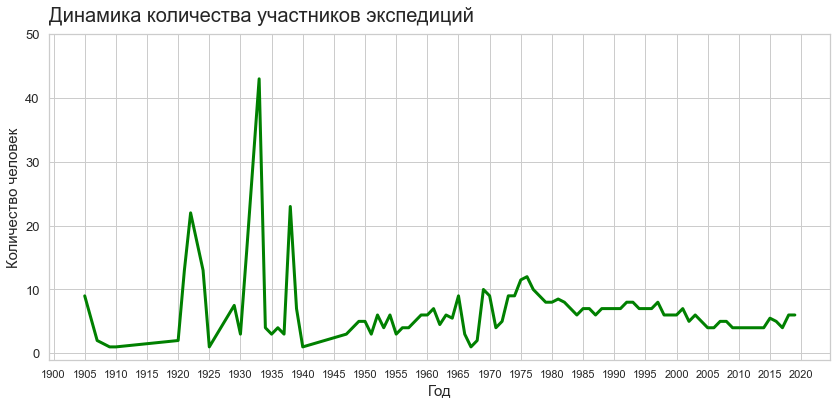

In [17]:
expedition = df_total_clean[['year','expedition_id','member_id']].groupby(['year','expedition_id']).count().sort_values('year').reset_index()
expedition = expedition.groupby(['year']).median('expedition_id').reset_index()

ax.set_title('Динамика успешности экспедиций',loc='left',fontsize=20, y=1.02)
fig, ax = plt.subplots(figsize=(14,6))
plt.plot(expedition['year'], expedition['member_id'],linewidth = 3, color='green',label='чел')
# plt.plot(expedition['year'], expedition['hired'],linewidth = 3, color='red',label='success')

ax.set_title('Динамика количества участников экспедиций',loc='left',fontsize=20, y=1.02)
ax.set_ylabel('Количество человек',fontsize = 15)
ax.set_xlabel('Год',fontsize = 15)
ax.tick_params(axis='x', labelsize=11)
ax.tick_params(axis='y', labelsize=13)

ax.set_xticks(np.arange(1900, 2025, 5))
ax.set_yticks(np.arange(0, 60, 10))
plt.show()

Как видно из графика - в 20-30 гг ХХ века предпринимались самые масштабные экспедиции. Видим отчетливый спад в период 2-й мировой войны. В дальнейшем состав участников не превышает 10 человек (за исключением середины 1970-х).

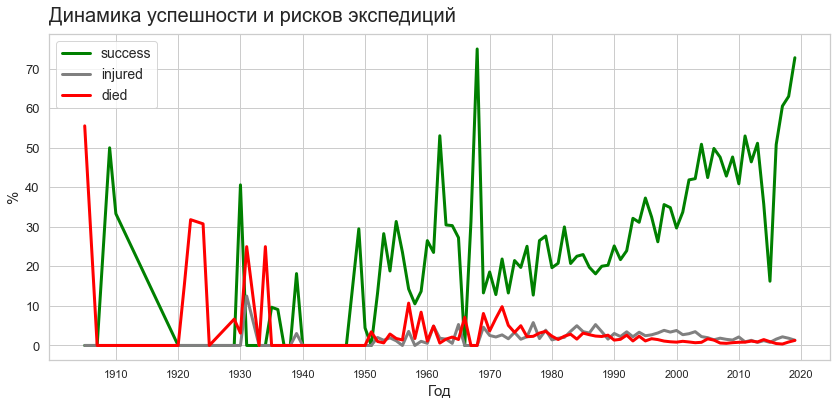

In [18]:
success = df_total_clean.groupby('year').mean()*100
ax.set_title('Динамика успешности экспедиций',loc='left',fontsize=20, y=1.02)
fig, ax = plt.subplots(figsize=(14,6))
plt.plot(success.index, success['success'],linewidth = 3, color='green',label='success')
plt.plot(success.index, success['injured'],linewidth = 3, color='gray',label='injured')
plt.plot(unsuccess.index, success['died'],linewidth = 3, color='red',label='died')
ax.set_title('Динамика успешности и рисков экспедиций',loc='left',fontsize=20, y=1.02)
ax.set_ylabel('%',fontsize = 15)
ax.set_xlabel('Год',fontsize = 15)
ax.tick_params(axis='x', labelsize=11)
ax.tick_params(axis='y', labelsize=13)

plt.legend(loc=2, prop={'size': 14})
ax.set_xticks(np.arange(1910, 2025, 10))
plt.show()

Видим положительную динамику успешности и отрицательную по рискам смерти и травмам.

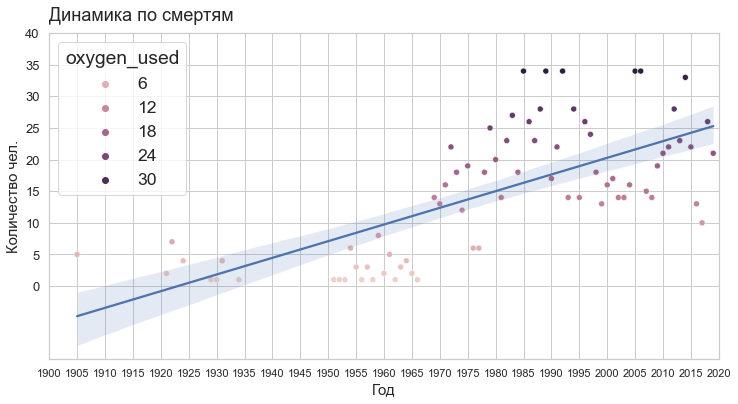

In [19]:
death_by_year = df_total_clean[df_total_clean['died'] == 1].groupby('year').count()
fig, ax = plt.subplots(figsize=(12,6))
ax = sns.scatterplot(data=death_by_year, x=death_by_year.index, y=death_by_year['died'], ax=ax, hue='oxygen_used')
sns.regplot(data=death_by_year, x=death_by_year.index, y=death_by_year['died'], ax=ax, scatter=False)
ax.set_title('Динамика по смертям',loc='left',fontsize=18, y=1.02)
ax.set_ylabel('Количество чел.',fontsize = 15)
ax.set_xlabel('Год',fontsize = 15)
ax.tick_params(axis='x', labelsize=11)
ax.tick_params(axis='y', labelsize=13)
ax.set_yticks(np.arange(0, 45, 5))
ax.set_xticks(np.arange(1900, 2021, 5)) 
plt.show()

Для анализа категориальных признаков воспользуемся  функцией crosstab.

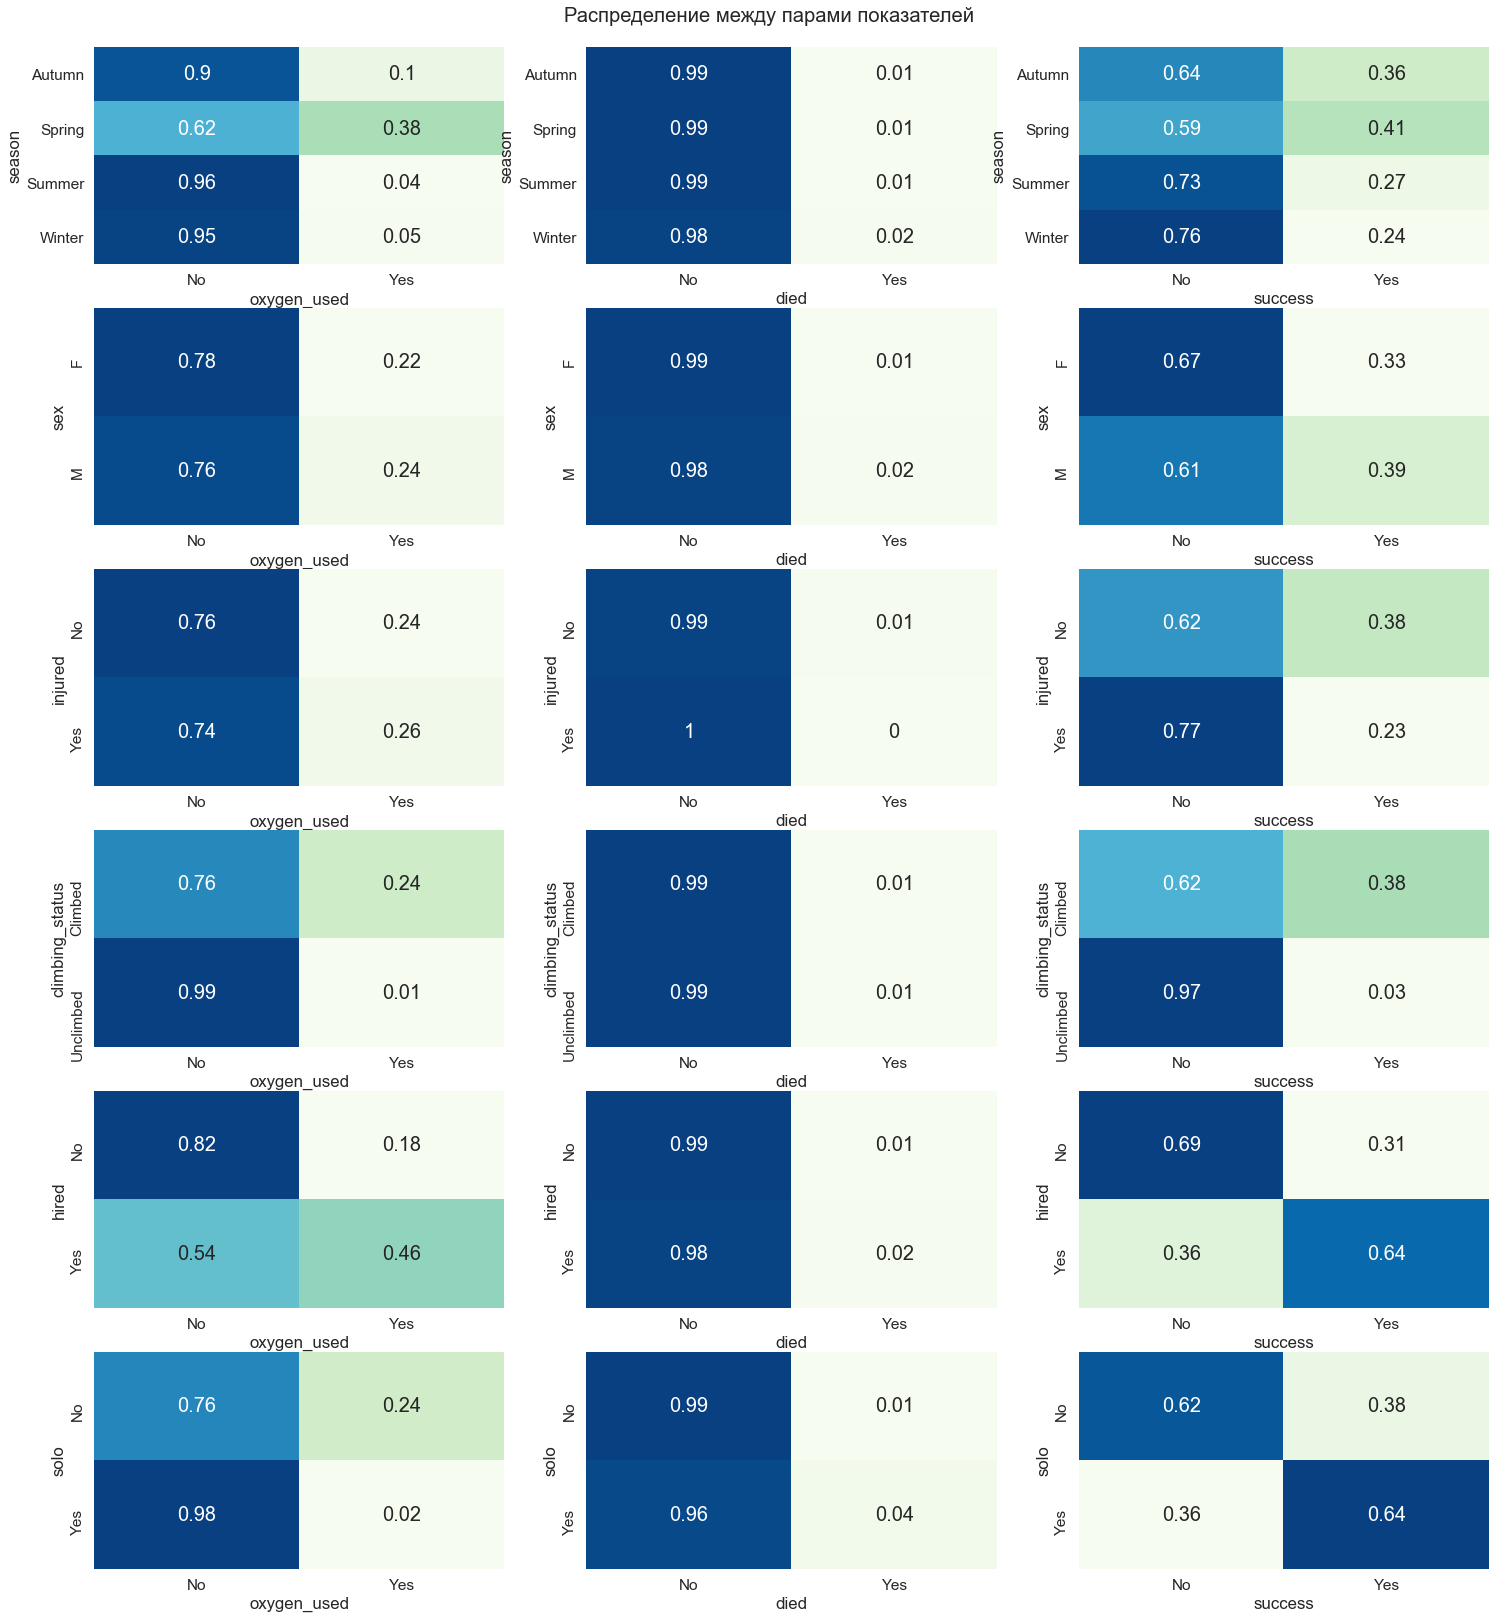

In [20]:
# Для корректной crosstab удалим 1 строку
df_total_clean[df_total_clean.season == 'Unknown']
df_total_clean.drop(df_total_clean[df_total_clean.season == 'Unknown'].index,axis=0, inplace=True)

# Для лучшего восприятия визуализации заменим численные значения
df_total_cross = df_total_clean.replace({0:'No', 1:'Yes'})

cross_list = ['season', 'sex','injured', 'climbing_status','hired',  'solo']
cross_list2 = ['oxygen_used', 'died', 'success']
sns.set(font_scale=1.4)
fig, axs = plt.subplots(figsize=(25, 28), nrows=6, ncols=3)

for i in range(0, len(cross_list)):
    for j in range(0, len(cross_list2)):
        sns.heatmap(pd.crosstab(df_total_cross[cross_list[i]], df_total_cross[cross_list2[j]], normalize='index').round(2),cmap="GnBu",annot=True, cbar=False,fmt='.5g',annot_kws={'fontsize':20}, ax = axs[i][j])
#         plt.xlabel(cross_list[i])
#         plt.ylabel(cross_list2[j])

fig.suptitle('Распределение между парами показателей', y=0.90)
plt.show()

### Выводы по визуализации crosstab:
Основное время года для восхождения - весна и осень. При этом весной больше доля успешных восхождений, чем осенью.

Осенью использование кислорода гораздо ниже.

Распределение по половому признаку за явным превосходством мужского пола

Травмированные восходители выживали в большинстве случаев

Соло-восходители(одиночное восхождение)   -  довольно редкое явление.

Успех в соло-восхождении выше, чем в стандартной экспедиции.    

In [21]:
# пол также заменим 0 - женский, 1 - мужской
df_total_clean['sex'].replace({'F':0, 'M':1}, inplace=True)
# построим сводную таблицу для вершин выше 7000 метров (лучше было бы выбрать только 8000, но их только 15 -  выборка слишком маленькая)
df_pivot_7000 = pd.pivot_table(df_total_clean[df_total_clean["height_metres"] >= 7000],index=["peak_name"]).sort_values('height_metres', ascending=False)

Построим матрицу парных корреляций для отобранных данных при помощи метода corr() pandas.
Визуализируем полученную матрицу при помощи seaborn heatmap.

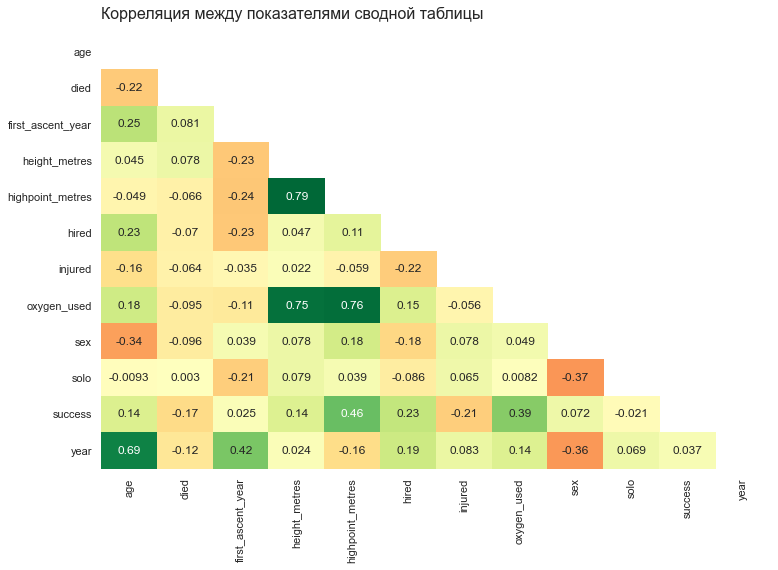

In [22]:
# df_corr = df_total_clean[research_list]
df_corr = df_pivot_7000
df_corr = df_corr.corr()
sns.set_theme(style="whitegrid")
mask = np.zeros_like(df_corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(12,8))
sns.heatmap(df_corr, center=0, annot=True,cmap='RdYlGn',cbar=False,  mask=mask)
plt.title('Корреляция между показателями сводной таблицы',fontsize = 16,loc='left', y=1.02)
plt.show()

Из матрицы выше выявляем ряд интересных зависимостей:

Прямая корреляционна зависимость:

1. Использование кислорода - высота подъема
2. Использование кислорода - успех экспедиции
3. Достижение вершины  -  использование кислорода
4. Высота вершины - высочайшая точка подъема экспедиции
5. Год и возраст восходителей
6. Высота подъема - успех при восхождении

Построим диаграммы рассеивания по показателям с самыми сильными зависимостями

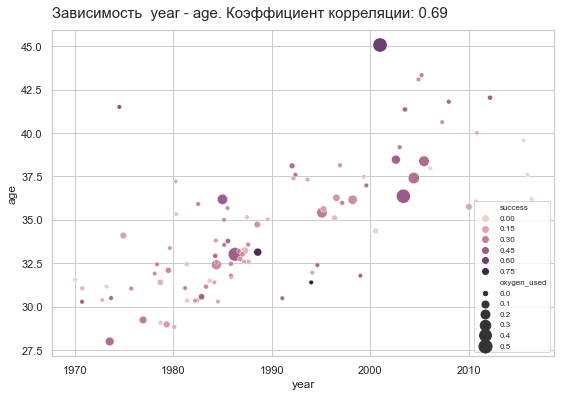

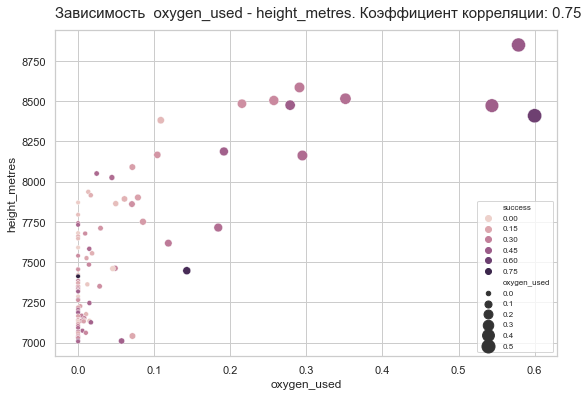

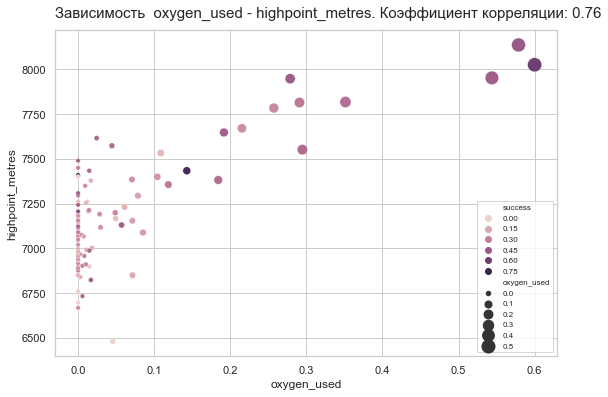

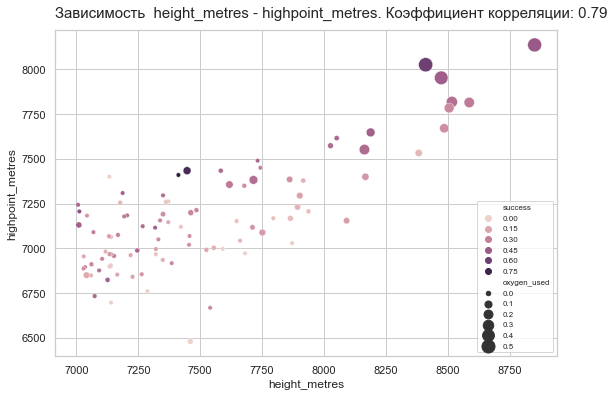

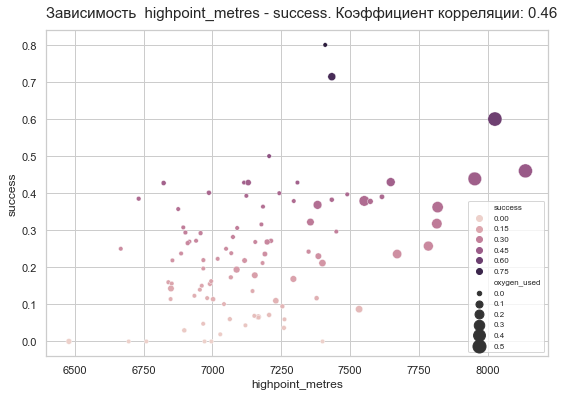

In [23]:
research_list = ['year','age', 'died', 'first_ascent_year', 'oxygen_used','height_metres', 'highpoint_metres','hired', 'injured',  'sex', 'solo', 'success']
for i in range(0, len(research_list)):
    for j in range(i+1, len(research_list)):
        curr_corr = df_pivot_7000[research_list[i]].corr(df_pivot_7000[research_list[j]])
        if abs(curr_corr) >= 0.45 and i != j:
            fig, ax = plt.subplots(figsize=(9,6))
            sns.scatterplot(data=df_pivot_7000, x=research_list[i], y=research_list[j], ax=ax,size='oxygen_used', sizes=(20, 200), hue='success')
            ax.set_title('Зависимость' '  ' + research_list[i]  + ' - ' + research_list[j] + '. Коэффициент корреляции: ' + str(np.round(curr_corr,2)), fontsize = 15,loc='left', y=1.02)
            plt.legend(loc=4, prop={'size': 8})

### Выводы по корреляции:

Зависимость year - age. Коэффициент корреляции: 0.7 - наблюдается рос возраста восходителей

Зависимость oxygen_used - height_metres. Коэффициент корреляции: 0.76 - кислород используют чаще после высоты 7000 метров

Зависимость oxygen_used - highpoint_metres. Коэффициент корреляции: 0.77 - кислород помогает подняться выше

Зависимость highpoint_metres - success. Коэффициент корреляции: 0.47  - чем выше точка подъемы - тем больше шанс успеха

In [24]:
# Создадим сводную таблицу с вершинами свыше 8000 метров
df_pivot_8000 = df_pivot_7000[df_pivot_7000["height_metres"] >= 8000]

df_pivot_8000.loc['Total']= (df_pivot_8000.median())
df_pivot_8000[['age', 'died','injured', 'oxygen_used', 'sex', 'solo', 'success']]

,age,died,injured,oxygen_used,sex,solo,success
peak_name,,,,,,,
Everest,36.361528,0.014028,0.022234,0.578829,0.919314,0.000367,0.460093
Kangchenjunga,35.408664,0.036823,0.043321,0.290975,0.927798,0.003610,0.317690
Lhotse,37.405212,0.008827,0.023119,0.351408,0.913409,0.001261,0.362337
Yalung Kang,32.422330,0.048544,0.019417,0.257282,0.946602,0.000000,0.257282
Makalu,36.158420,0.019958,0.043243,0.215385,0.910603,0.003326,0.235759
Kangchenjunga South,36.180328,0.000000,0.000000,0.278689,0.967213,0.000000,0.442623
Kangchenjunga Central,33.017544,0.000000,0.000000,0.543860,0.982456,0.000000,0.438596
Lhotse Middle,45.066667,0.000000,0.000000,0.600000,1.000000,0.000000,0.600000
Lhotse Shar,33.231884,0.036232,0.036232,0.108696,0.971014,0.000000,0.086957


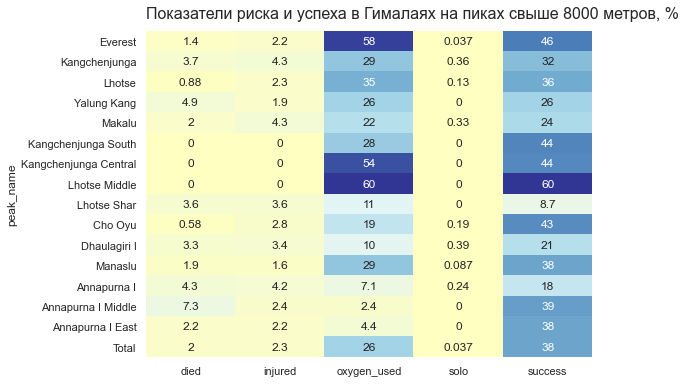

In [25]:
# построим тепловую карту по данной таблице
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(df_pivot_8000[['died','injured', 'oxygen_used', 'solo', 'success']] * 100, center=0, annot=True,cmap='RdYlBu',cbar=False)
ax.set_title('Показатели риска и успеха в Гималаях на пиках свыше 8000 метров, %',loc='left',fontsize=16, y=1.02)
plt.show()

### Выводы по сводной таблице:

Использование кислорода при подъеме на самые высокие вершины достигает 60%

Есть более опасные горы в части риска смерти, чем Эверест (например Annapurna I Middle).

Соло-восхождения на такие вершины (выше 8000 м) практические не производились


P.S. Теперь вы знаем, если вы собрались покорить самую высокую гору планеты ваш шанс на  успех составляет 46%, риск получить травму 2,2%, а риск умереть 1,4%, а больше шансов подняться весной и с использованием кислорода.